In [475]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [476]:
train = pd.read_csv('train (1).csv')
test = pd.read_csv('titanic_test.csv')

In [477]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [478]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [479]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [480]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [481]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [482]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [483]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [484]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [485]:
train.drop(columns = ['Cabin'],inplace =True)
test.drop(columns = ['Cabin'],inplace = True)

In [486]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [487]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [488]:
train['Embarked'].fillna('S',inplace=True)

In [489]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [490]:
# age 

(177/891)*100

19.865319865319865

In [491]:
# age imputed by random imputation 

# train['age_imputed'] = train['Age']
# test['age_imputed'] = test['Age']

In [492]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [493]:
#train['age_imputed'][train['age_imputed'].isnull()]=train['Age'].dropna().sample(train['Age'].isnull().sum(),random_state=int('Fare')).values
#test['age_imputed'][test['age_imputed'].isnull()]=train['Age'].dropna().sample(test['Age'].isnull().sum(),random_state=int('Fare')).values

In [494]:
## fill na values of Age column by method of End of Distribution Imputation:- 68% values we choose correct.

train_age = np.random.randint(train['Age'].mean()-2*train['Age'].std(),train['Age'].mean()+2*train['Age'].std(),177)
test_age = np.random.randint(test['Age'].mean()-2*test['Age'].std(),test['Age'].mean()+2*test['Age'].std(),86)

In [495]:
train['Age'][train['Age'].isnull()]=train_age
test['Age'][test['Age'].isnull()]=test_age

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12200\1469562651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()]=train_age
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12200\1469562651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()]=test_age


In [496]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [497]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [498]:
# EDA

pd.crosstab(train['Pclass'],train['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [499]:
train[train['Pclass']==1]['Survived'].value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [500]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [501]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [502]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [503]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

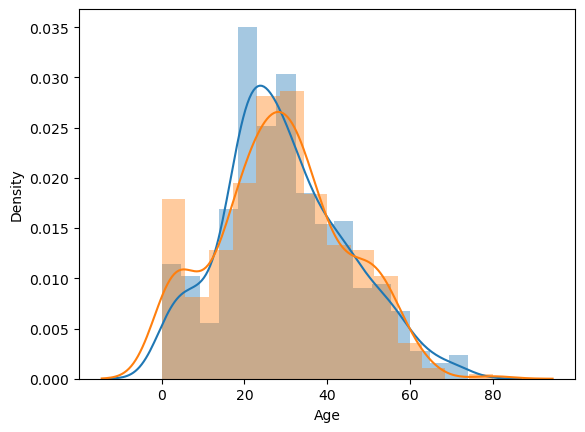

In [504]:
sns.distplot(train['Age'][train['Survived']==0])
sns.distplot(train['Age'][train['Survived']==1])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

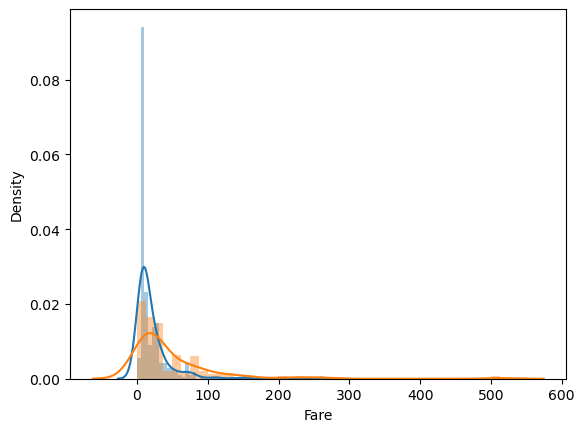

In [505]:
sns.distplot(train['Fare'][train['Survived']==0])
sns.distplot(train['Fare'][train['Survived']==1])

In [506]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [507]:
train['Title'] = train['Name'].str.split((','),expand = True)[1].str.split(('.'),expand = True)[0]
test['Title'] = test['Name'].str.split((','),expand = True)[1].str.split(('.'),expand = True)[0]

In [508]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs


In [509]:
train['Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
Name: Title, dtype: int64

In [510]:
train['Title'] = train['Title'].str.replace('Ms','Miss')
train['Title'] = train['Title'].str.replace('Mlle','Miss')

In [511]:
test['Title'] = test['Title'].str.replace('Ms','Miss')
test['Title'] = test['Title'].str.replace('Mlle','Miss')

In [512]:
train['Title'].value_counts()

 Mr              517
 Miss            185
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Col               2
 Don               1
 Mme               1
 Lady              1
 Sir               1
 Capt              1
 the Countess      1
 Jonkheer          1
Name: Title, dtype: int64

In [513]:
train['family']=train['SibSp'] + train['Parch'] + 1
test['family']=test['SibSp'] + test['Parch'] + 1

In [514]:
train['family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family, dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='family', ylabel='Density'>

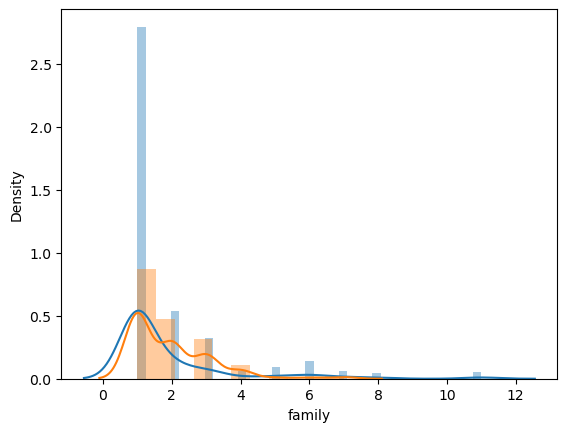

In [515]:
sns.distplot(train['family'][train['Survived']==0])
sns.distplot(train['family'][train['Survived']==1])

In [516]:
train.groupby(['family'])['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [517]:
def size(number):
    if number == 1:
        return 'Alone'
    elif number >1 and number < 5:
        return 'Medium'
    else: 
        return 'Large'

In [518]:
train['family_size'] = train['family'].apply(size)
test['family_size'] = test['family'].apply(size)

In [519]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,family,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,2,Medium


In [520]:
train.drop(columns=['Name','SibSp','Parch','family','Ticket'],inplace = True)
test.drop(columns=['Name','SibSp','Parch','family','Ticket'],inplace = True)

In [521]:
train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,family_size
0,1,0,3,male,22.0,7.2500,S,Mr,Medium
1,2,1,1,female,38.0,71.2833,C,Mrs,Medium


In [522]:
print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


In [523]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
family_size    0
dtype: int64

In [524]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
family_size    0
dtype: int64

In [525]:
passengerId = test['PassengerId'].values

In [526]:
train.drop(columns = ['PassengerId'],inplace = True)
test.drop(columns = ['PassengerId'],inplace = True)

In [527]:
train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
family_size    0
dtype: int64

In [528]:
train.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,family_size
0,0,3,male,22.0,7.2500,S,Mr,Medium
1,1,1,female,38.0,71.2833,C,Mrs,Medium


In [529]:
test.head(2)

,Pclass,Sex,Age,Fare,Embarked,Title,family_size
0,3,male,34.5,7.8292,Q,Mr,Alone
1,3,female,47.0,7.0000,S,Mrs,Medium


In [530]:
test['Title'].value_counts()

 Mr        240
 Miss       79
 Mrs        72
 Master     21
 Col         2
 Rev         2
 Dr          1
 Dona        1
Name: Title, dtype: int64

In [531]:
train=pd.get_dummies(train,columns=['Pclass','Sex','Embarked','Title','family_size'],drop_first=True)
test=pd.get_dummies(test,columns=['Pclass','Sex','Embarked','Title','family_size'],drop_first=True)

In [532]:
train.shape ,   test.shape

((891, 24), (418, 16))

In [533]:
X = train.iloc[:,1:].values
y= train.iloc[:,0].values

In [538]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [539]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [540]:
y_pred = lr.predict(X_test)

In [545]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8212290502793296

In [546]:
X_f = test.iloc[:,:].values

In [547]:
y_final = lr.predict(X_f)

ValueError: X has 16 features, but LogisticRegression is expecting 23 features as input.

In [250]:
passengerId.shape

(418,)

In [251]:
final = pd.DataFrame()

In [252]:
final

""


In [253]:
final['passengerId']= passengerId
final['survived'] = y_final

In [254]:
final

,passengerId,survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
